In [1]:
import zipfile
import os
import glob
import PIL
import cv2
import json
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from IPython import display
import matplotlib.pyplot as plt
import matplotlib.image as img
%matplotlib inline

print("tensorflow", tf.__version__)
print("numpy", np.__version__)
print("PIL", PIL.__version__)

tensorflow 2.6.0
numpy 1.21.4
PIL 8.3.2


### sample

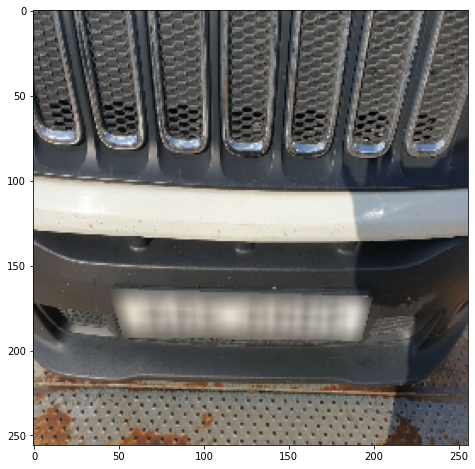

In [2]:
# 이미지 하나 보기 
img_path = os.getenv('HOME')+'/aiffel/0aiffelthon/sam_img/0000459_sc-226797.jpg'

img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (256, 256))

plt.figure(figsize = (8, 8))
plt.imshow(img)

1200


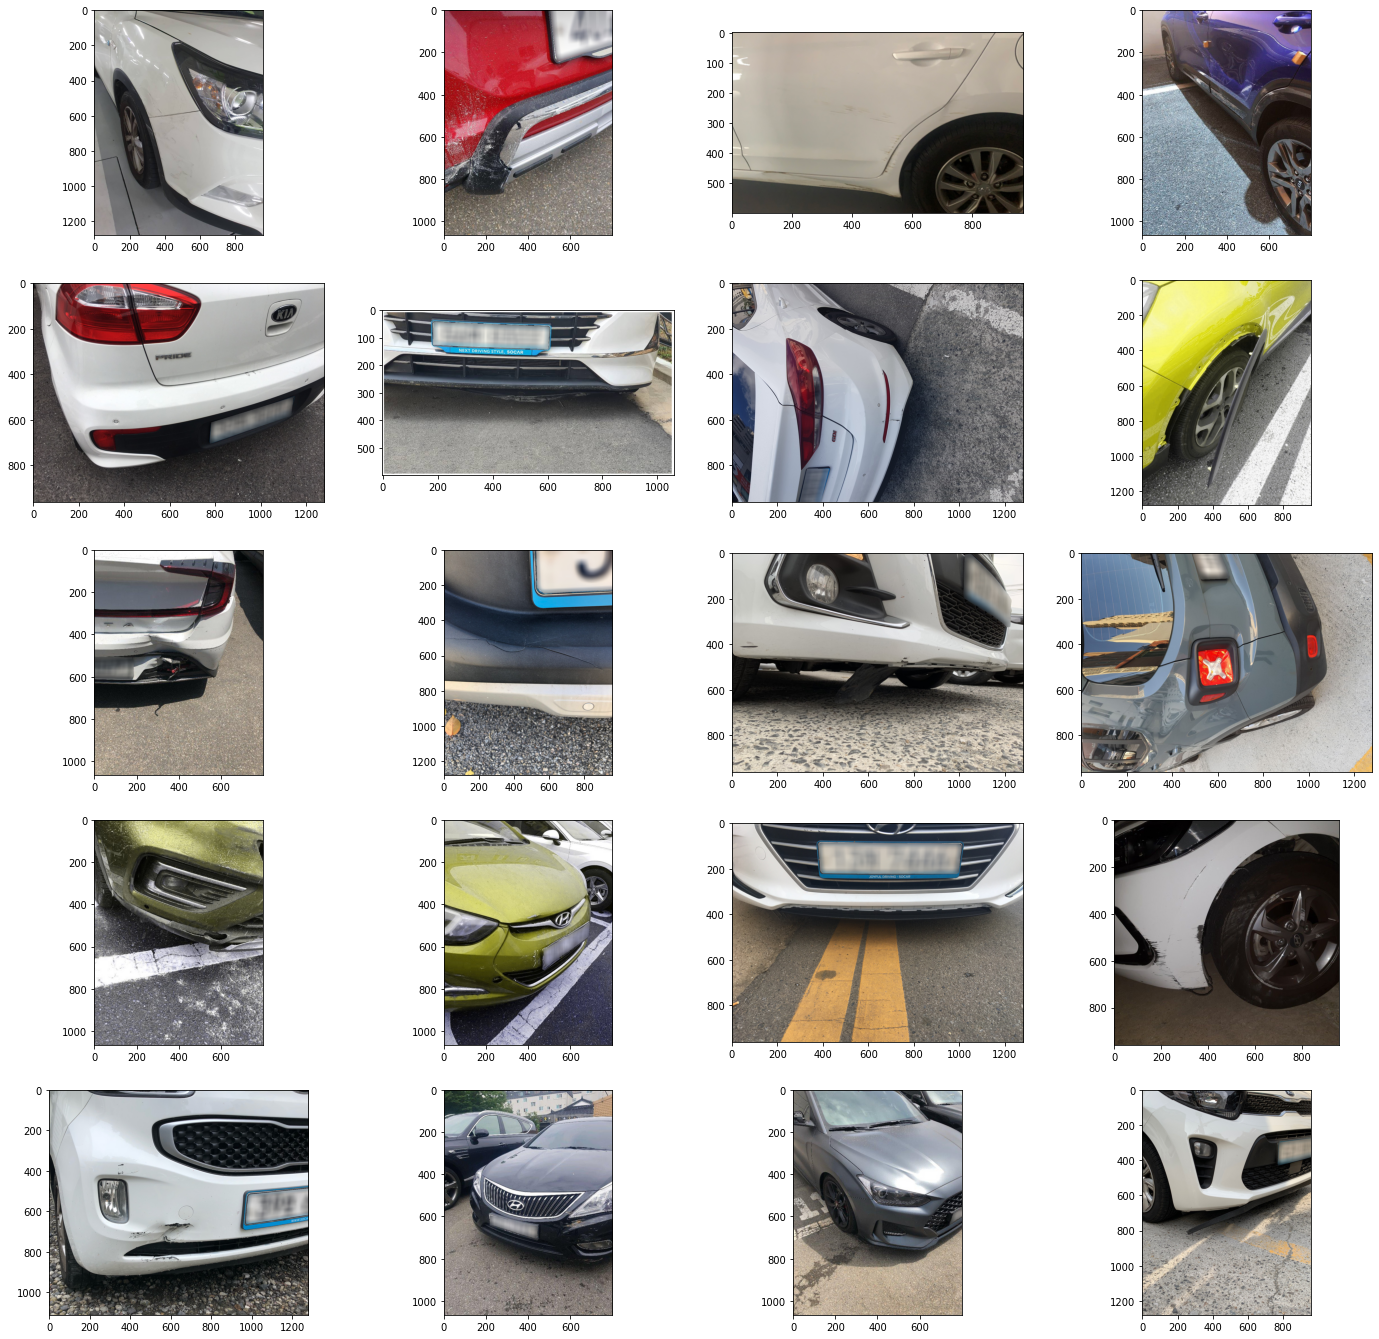

In [2]:
# 여러 이미지 보기
dir_path = os.getenv('HOME')+'/aiffel/0aiffelthon/sam_img'
file_list = os.listdir(dir_path)
print(len(file_list))

fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(24,24))

# flatten axes for easy iterating
for i, ax in enumerate(axes.flatten()):
    image = img.imread(dir_path+'/'+file_list[i])
    ax.imshow(image)
plt.show()

fig.tight_layout()

In [4]:
# json 첫번째 파일 보기  
file_path = os.getenv('HOME')+'/aiffel/0aiffelthon/sam_label'

file = glob.glob(file_path + "/*.json") 

with open(file[0], 'r') as file:
    data = json.load(file)
    print(type(data))
    print(data)

<class 'dict'>
{'info': {'name': 'socar', 'date_created': '03/08/2022'}, 'images': {'id': 1, 'width': 1050, 'height': 600, 'file_name': '0191931_sc-111998.jpg'}, 'annotations': [{'id': 2, 'image_id': 1, 'category_id': 'sc-111998', 'segmentation': [[[[1005, 32], [1020, 40], [890, 147], [823, 193], [809, 200], [699, 237], [679, 223], [792, 181], [858, 137], [1005, 32]]]], 'area': 8649.5, 'bbox': [679, 32, 341, 205], 'damage': 'Separated', 'part': None, 'year': 2013, 'color': 'White', 'level': None, 'repair': []}, {'id': 3, 'image_id': 1, 'category_id': 'sc-111998', 'segmentation': [[[[785, 386], [886, 394], [872, 421], [775, 410], [785, 386]]]], 'area': 2638.5, 'bbox': [775, 386, 111, 35], 'damage': 'Scratched', 'part': None, 'year': 2013, 'color': 'White', 'level': None, 'repair': []}, {'id': 4, 'image_id': 1, 'category_id': 'sc-111998', 'segmentation': [[[[991, 389], [975, 408], [954, 406], [958, 392], [991, 389]]]], 'area': 440.5, 'bbox': [954, 389, 37, 19], 'damage': 'Scratched', 'pa

In [ ]:
# json 안의 damage 값의 unique 뽑기 
unique_labels = set()

for file_name in os.listdir(file_path):
    if file_name.endswith('.json'):
        file_path = os.path.join(file_path, file_name)
        with open(file_path, 'r') as f:
            json_data = json.load(f)
            for obj in json_data:
                if 'damage' in obj:
                    unique_labels.add(obj['damage'])
print(unique_labels)